## Polynomial Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import metrics
%matplotlib inline

### 1. Explore the dataset

In [2]:
poly = pd.read_csv('polynomial_reg.csv')

In [3]:
poly

,Unnamed: 0,x,y
0,0,-0.218372,-1.153546
1,1,-1.202117,-11.147821
2,2,-1.219273,7.139288
3,3,0.614203,-1.534392
4,4,0.175771,2.473738
5,5,-0.526240,-2.983978
6,6,-0.365348,-9.153118
7,7,1.146567,6.574776


In [4]:
poly.sort_values(by='x', inplace=True)
x = poly['x'].values
y = poly['y'].values

In [5]:
x

array([-1.21927293, -1.20211674, -0.52624011, -0.36534834, -0.21837184,
        0.17577089,  0.61420293,  1.14656704])

In [6]:
y

array([  7.13928837, -11.1478206 ,  -2.98397802,  -9.15311837,
        -1.15354604,   2.47373811,  -1.53439198,   6.57477564])

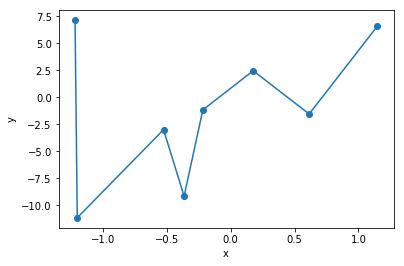

In [7]:
plt.scatter(x,y)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y');

### 2. Compute $R^2$ for each degree model

In [8]:
for n in range(1,9):
    polyf = preprocessing.PolynomialFeatures(degree = n)
    X_poly = polyf.fit_transform(x.reshape(-1,1))
    
    lm_lr = linear_model.LinearRegression()
    lm_lr.fit(X_poly, y)
    y_pred = lm_lr.predict(X_poly)
    
    r2 = metrics.r2_score(y, y_pred)
    print('R^2 for degree %s is %s' % (n, r2))        

R^2 for degree 1 is 0.1507142478228365
R^2 for degree 2 is 0.2638482927478246
R^2 for degree 3 is 0.272059463054085
R^2 for degree 4 is 0.37467394118841657
R^2 for degree 5 is 0.37811972122042037
R^2 for degree 6 is 0.7778494109650003
R^2 for degree 7 is 1.0
R^2 for degree 8 is 1.0


Result:

- When the degree $n$ increases, the $R^2$ also increases.
- $R^2$ reaches $1$ when the degree $n \geq 7$.
- $R^2$ increases because the model becomes more complex the fits the data better. 
- However, there are only 8 data points, thus the $R^2$ will become $100\%$ when degree $n \geq 7$ where the degree of freedom for the model is $8-8 = 0$.


### 3. Compute $argmax_n \ p(M_n|D)$

From question (a) to (d), we have that:

$argmax_n \ p(M_n|D) = argmax_n \ p(D|M_n)$

and:
$$p(D|X_n)  = p(X) \int N(y;X_nw,\sigma^2I_N) \ N(w;0,\Sigma_p) $$

where:
$$\int N(y;X_nw,\sigma^2I_N) \ N(w;0,\Sigma_p) = \frac{ \sqrt{\text{det}A}} {(2\pi)^{N/2} \sigma^{N} \sqrt{\text{det}\Sigma_p}} \ \exp\left\{ -\frac{1}{2} y^T \left( \frac{1}{\sigma^2}I_N - \frac{1}{\sigma^4}X_nA^TX_n^T \right)y \right\}$$

$$A = \left( \frac{1}{\sigma^2}X_n^TX_n + \Sigma_p^{-1} \right)^{-1}$$

In this question, we use: $\sigma^2 = 1$ and $\Sigma_p = 0.85I_{n+1}$

where $n = 1,2,3,4,5,6,7,8$ and the number of data point $N = 8$

In [9]:
probs = []

for n in range(1,9):
    polyf = preprocessing.PolynomialFeatures(degree = n)
    X_poly = polyf.fit_transform(x.reshape(-1,1))

    Sigma_p = 0.85 * np.eye(n+1)
    A = np.linalg.inv(X_poly.T.dot(X_poly) + np.linalg.inv(Sigma_p))

    prob = np.linalg.det(A)**0.5 / ( (2*np.pi)**4 * np.linalg.det(Sigma_p)**0.5 ) * \
           np.exp( -0.5 * y.T.dot( np.eye(8) - X_poly.dot(A.T).dot(X_poly.T) ).dot(y) )

    probs.append(prob)

In [10]:
for prob in probs:
    print('Conditional probability p(D|Mn) for degree %s is %s' % (probs.index(prob)+1, prob)) 

Conditional probability p(D|Mn) for degree 1 is 8.212638793848954e-64
Conditional probability p(D|Mn) for degree 2 is 3.074557086829451e-60
Conditional probability p(D|Mn) for degree 3 is 2.82960743167754e-60
Conditional probability p(D|Mn) for degree 4 is 4.2673415425960274e-58
Conditional probability p(D|Mn) for degree 5 is 2.861550657314426e-58
Conditional probability p(D|Mn) for degree 6 is 5.215166827352842e-57
Conditional probability p(D|Mn) for degree 7 is 3.6607910713648737e-57
Conditional probability p(D|Mn) for degree 8 is 4.311090773540813e-56


In [11]:
max(probs)

4.311090773540813e-56

In [12]:
np.argmax(probs) + 1

8

Result:

- Maximum conditional probability $p(D|Mn)$ = 4.311090773540813e-56 is reached when degree $n=8$
- Again, the model prefers the largest degree n, which the most complex model. This happens because the model is not adding any penalty term for balancing the model complexity to prevent overfitting problem.

### 4. Run polynomial regression using best n = 8

In [13]:
n = 8
polyf = preprocessing.PolynomialFeatures(degree = n)
X_poly = polyf.fit_transform(x.reshape(-1,1))

lm_lr = linear_model.LinearRegression()
lm_lr.fit(X_poly, y)
y_pred = lm_lr.predict(X_poly)

In [14]:
# coefficients w
lm_lr.coef_    

array([-1.04487530e-11,  5.41944128e+00, -3.07116472e+02, -1.57610286e+02,
        1.16018272e+03,  4.13727395e+02, -1.20914069e+03, -2.16878831e+02,
        3.74368799e+02])

In [15]:
y_pred

array([  7.13928837, -11.1478206 ,  -2.98397802,  -9.15311837,
        -1.15354604,   2.47373811,  -1.53439198,   6.57477564])

In [16]:
# r^2
metrics.r2_score(y, y_pred)

1.0

In [17]:
# MSE: mean square error
metrics.mean_squared_error(y, y_pred)

9.638378960890516e-26

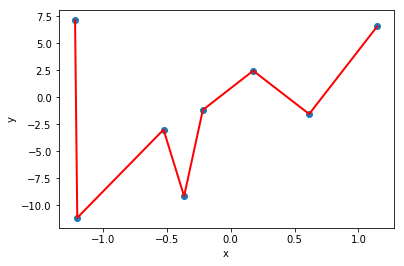

In [18]:
# plot predicted line
plt.scatter(x, y)
plt.plot(x, y_pred, color='r', linewidth=2)
plt.xlabel('x')
plt.ylabel('y');

Result:

- The $R^2$ is 1.0, which is a perfect model where the fitted y explains all of the data y's variance.
- The MSE is 9.638378960890516e-26, which is nearly 0.
- The fitted line goes through each data point precisely.
- In short, this is a perfect model for the given dataset. However, it can be an overfitting model as well if use it on the some new dataset in the future.